<a href="https://colab.research.google.com/github/jaya1734/Calculator/blob/main/Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle
import warnings
warnings.filterwarnings('ignore')
thyroid_df = pd.read_csv("/content/th.csv")
thyroid_df.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P


In [ ]:
thyroid_df.rename(columns={'binaryClass': 'Label'}, inplace=True)
thyroid_df.replace('?', np.nan, inplace=True)
thyroid_df.drop(['T3 measured', 'TSH measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'TBG',
                 'referral source', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                 'query hypothyroid', 'query hyperthyroid', 'hypopituitary', 'psych'], axis=1, inplace=True)
thyroid_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              3771 non-null   object
 1   sex              3622 non-null   object
 2   sick             3772 non-null   object
 3   pregnant         3772 non-null   object
 4   thyroid surgery  3772 non-null   object
 5   I131 treatment   3772 non-null   object
 6   lithium          3772 non-null   object
 7   goitre           3772 non-null   object
 8   tumor            3772 non-null   object
 9   TSH              3403 non-null   object
 10  T3               3003 non-null   object
 11  TT4              3541 non-null   object
 12  T4U              3385 non-null   object
 13  FTI              3387 non-null   object
 14  Label            3772 non-null   object
dtypes: object(15)
memory usage: 442.2+ KB


In [ ]:
thyroid_df.isnull().sum()


age                  1
sex                150
sick                 0
pregnant             0
thyroid surgery      0
I131 treatment       0
lithium              0
goitre               0
tumor                0
TSH                369
T3                 769
TT4                231
T4U                387
FTI                385
Label                0
dtype: int64

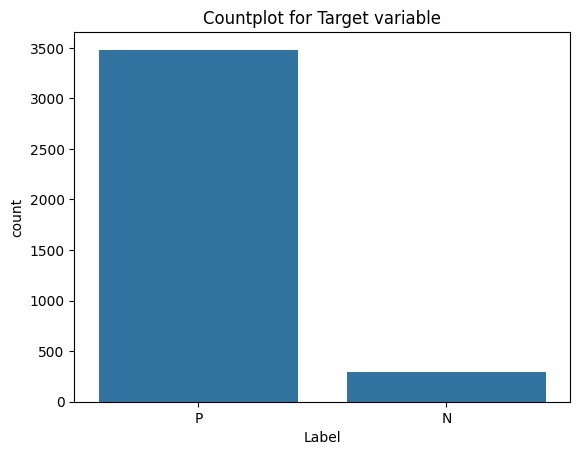

In [ ]:
sns.countplot(x='Label',data=thyroid_df)
plt.title("Countplot for Target variable");

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming you have already loaded and preprocessed your data in the thyroid_df DataFrame

# One-hot encode categorical variables
thyroid_df_encoded = pd.get_dummies(thyroid_df, drop_first=True)

# Check the column names in the encoded DataFrame
print(thyroid_df_encoded.columns)

# Assuming the target variable column is named 'Label_P', replace it accordingly
X = thyroid_df_encoded.drop('Label_P', axis=1)
y = thyroid_df_encoded['Label_P']

X = X.astype(float)  # Convert X to float type if it's not already
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Apply SMOTE resampling to balance the classes
smote = SMOTE(random_state=11)
X_smote, y_smote = smote.fit_resample(X_train, y_train)



Index(['age_10', 'age_11', 'age_12', 'age_13', 'age_14', 'age_15', 'age_16',
       'age_17', 'age_18', 'age_19',
       ...
       'FTI_91', 'FTI_92', 'FTI_93', 'FTI_94', 'FTI_95', 'FTI_96', 'FTI_97',
       'FTI_98', 'FTI_99', 'Label_P'],
      dtype='object', length=1073)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming x_smote and y_smote are defined and contain the resampled data

# Define the models
models = {
    LogisticRegression(max_iter=500): 'Logistic Regression'
}

# Train the models
for model in models.keys():
    model.fit(X_smote, y_smote)

# Evaluate the models on the test set
for model, name in models.items():
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Accuracy Score for {name} is : {accuracy * 100}%")



Accuracy Score for Logistic Regression is : 93.7748344370861%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the models
models = {
    RandomForestClassifier(n_estimators=500): 'Random Forest'
}

# Train the models
for model in models.keys():
    model.fit(X_smote, y_smote)

# Evaluate the models on the test set
for model, name in models.items():
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Accuracy Score for {name} is : {accuracy * 100}%")


Accuracy Score for Random Forest is : 92.05298013245033%


In [ ]:
from sklearn.metrics import classification_report

# Define the models
models = {
    LogisticRegression(max_iter=500): 'Logistic Regression',
    RandomForestClassifier(n_estimators=100): 'Random Forest'
}

# Train and evaluate the models
for model, name in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Classification Report for {name}")
    print("----------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("----------------------------------------------------------")


Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.22      0.35        58
           1       0.94      0.99      0.97       697

    accuracy                           0.94       755
   macro avg       0.85      0.61      0.66       755
weighted avg       0.93      0.94      0.92       755

----------------------------------------------------------
Classification Report for Random Forest
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.31      0.41        58
           1       0.94      0.98      0.96       697

    accuracy                           0.93       755
   macro avg       0.78      0.65      0.69       755
weighted avg       0.92      0.93      0.92       755

----------------------------------------------------------


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_smote,y_smote)
rf.score(X_test,y_test)

0.9231788079470199

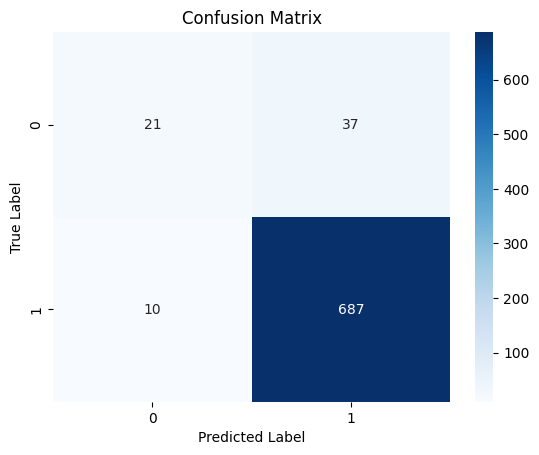

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


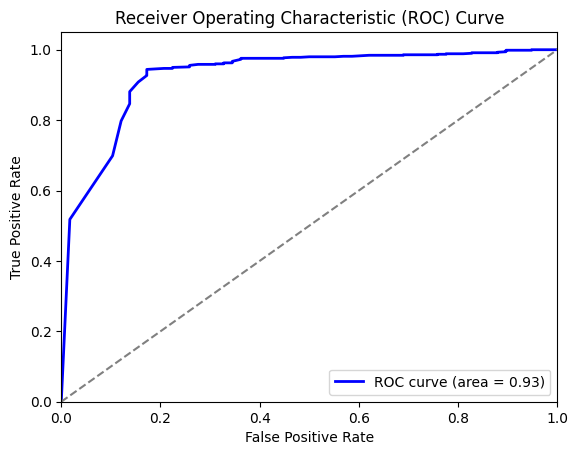

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


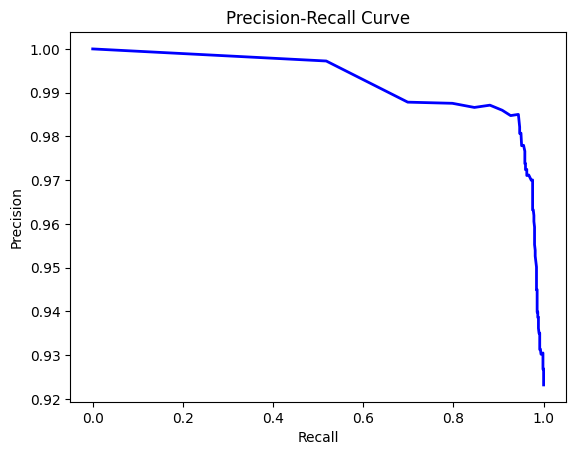

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


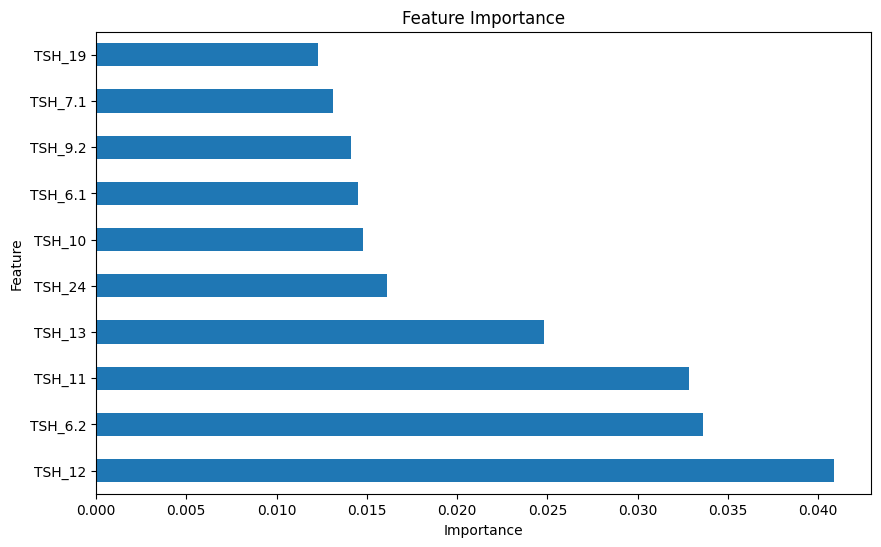

In [ ]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
import pandas as pd

data = pd.read_csv('/content/th.csv')

selected_data = data[['age', 'sex', 'TSH']]

selected_data.to_csv('/content/selected_features.csv', index=False)


In [ ]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

selected_data = pd.read_csv('/content/selected_features.csv')

selected_data.replace('?', np.nan, inplace=True)

selected_data['sex'] = selected_data['sex'].map({'M': 1, 'F': 0})

selected_data = selected_data.astype(float)

selected_data.dropna(inplace=True)

X = selected_data.drop('TSH', axis=1)
y = selected_data['TSH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

with open('/content/random_forest_regressor_model.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)


In [ ]:
import pandas as pd
import pickle

with open('/content/random_forest_regressor_model.pkl', 'rb') as file:
    rf_regressor = pickle.load(file)

selected_data = pd.read_csv('/content/selected_features.csv')

selected_data.replace('?', np.nan, inplace=True)

selected_data['sex'] = selected_data['sex'].map({'M': 1, 'F': 0})

selected_data = selected_data.astype(float)

selected_data.dropna(inplace=True)
selected_data['predicted_TSH'] = rf_regressor.predict(selected_data.drop('TSH', axis=1))

hyper_threshold = 5.0
hypo_threshold = 2.5
hyperthyroid_df = selected_data[selected_data['predicted_TSH'] > hyper_threshold]
hypothyroid_df = selected_data[selected_data['predicted_TSH'] < hypo_threshold]

# Save the dataframes to separate CSV files
hyperthyroid_df.to_csv('/content/hyperthyroid_predictions.csv', index=False)
hypothyroid_df.to_csv('/content/hypothyroid_predictions.csv', index=False)


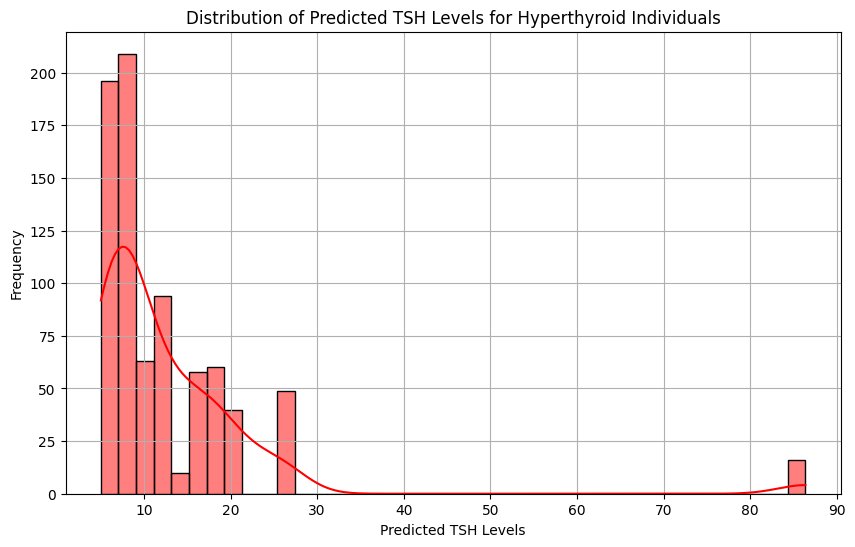

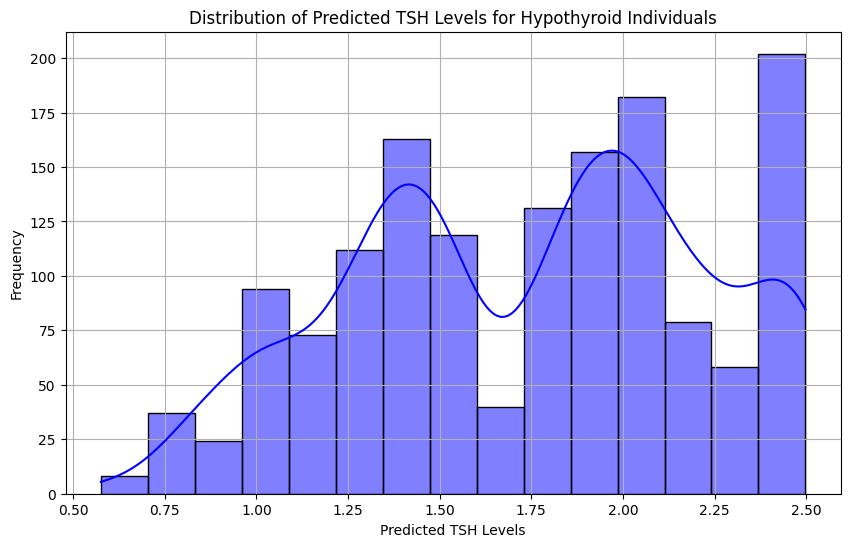

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hyperthyroid_df = pd.read_csv('/content/hyperthyroid_predictions.csv')
hypothyroid_df = pd.read_csv('/content/hypothyroid_predictions.csv')

plt.figure(figsize=(10, 6))
sns.histplot(data=hyperthyroid_df, x='predicted_TSH', color='red', kde=True)
plt.title('Distribution of Predicted TSH Levels for Hyperthyroid Individuals')
plt.xlabel('Predicted TSH Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=hypothyroid_df, x='predicted_TSH', color='blue', kde=True)
plt.title('Distribution of Predicted TSH Levels for Hypothyroid Individuals')
plt.xlabel('Predicted TSH Levels')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

predictions = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, predictions)

print("Mean Squared Error (MSE) for Random Forest Regressor:", mse)


Mean Squared Error (MSE) for Random Forest Regressor: 754.0509967476445


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)

print("R-squared (R2) score for Random Forest Regressor:", r2)


R-squared (R2) score for Random Forest Regressor: -0.08083642344956887


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE) for Random Forest Regressor:", mae)


Mean Absolute Error (MAE) for Random Forest Regressor: 7.064491181988474


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE) for Random Forest Regressor:", rmse)


Root Mean Squared Error (RMSE) for Random Forest Regressor: 27.459989015796136


In [ ]:
from sklearn.metrics import explained_variance_score

evs = explained_variance_score(y_test, predictions)
print("Explained Variance Score for Random Forest Regressor:", evs)


Explained Variance Score for Random Forest Regressor: -0.08060767639160482


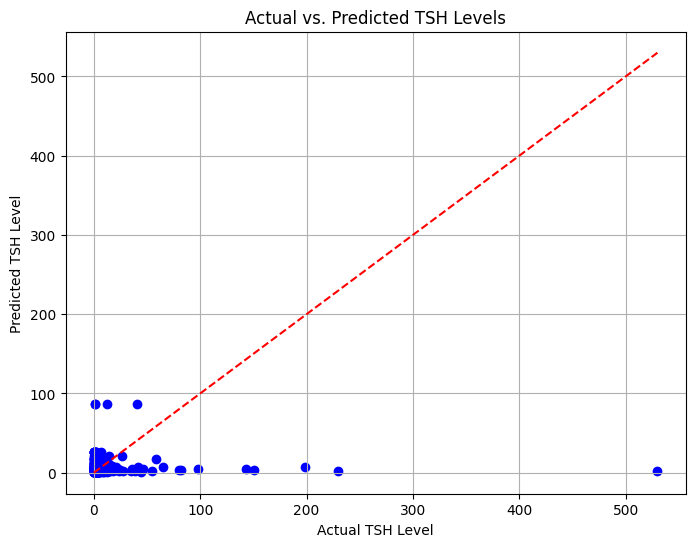

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual TSH Level')
plt.ylabel('Predicted TSH Level')
plt.title('Actual vs. Predicted TSH Levels')
plt.grid(True)
plt.show()


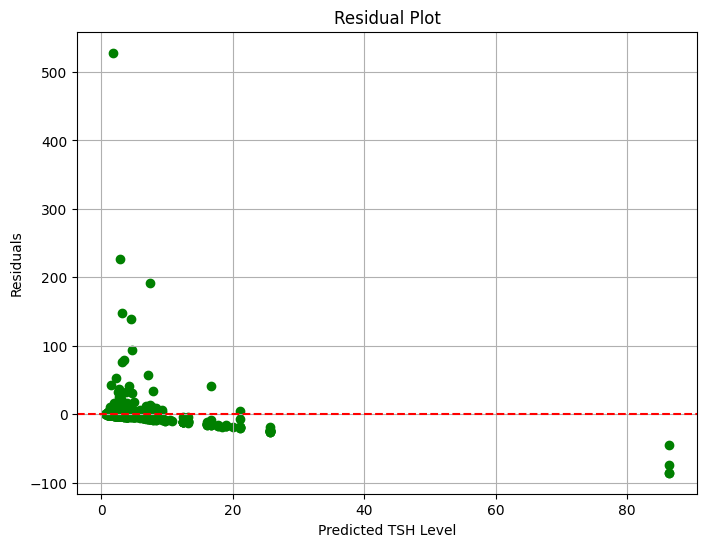

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions, y_test - predictions, color='green')
plt.xlabel('Predicted TSH Level')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()


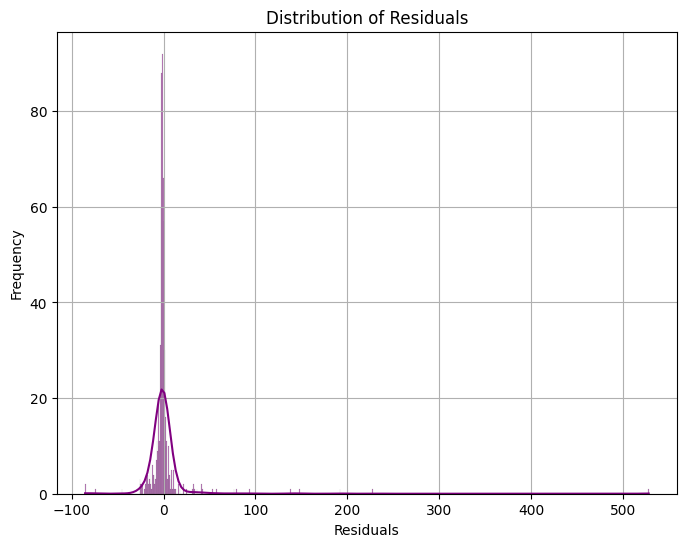

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(y_test - predictions, color='purple', kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()


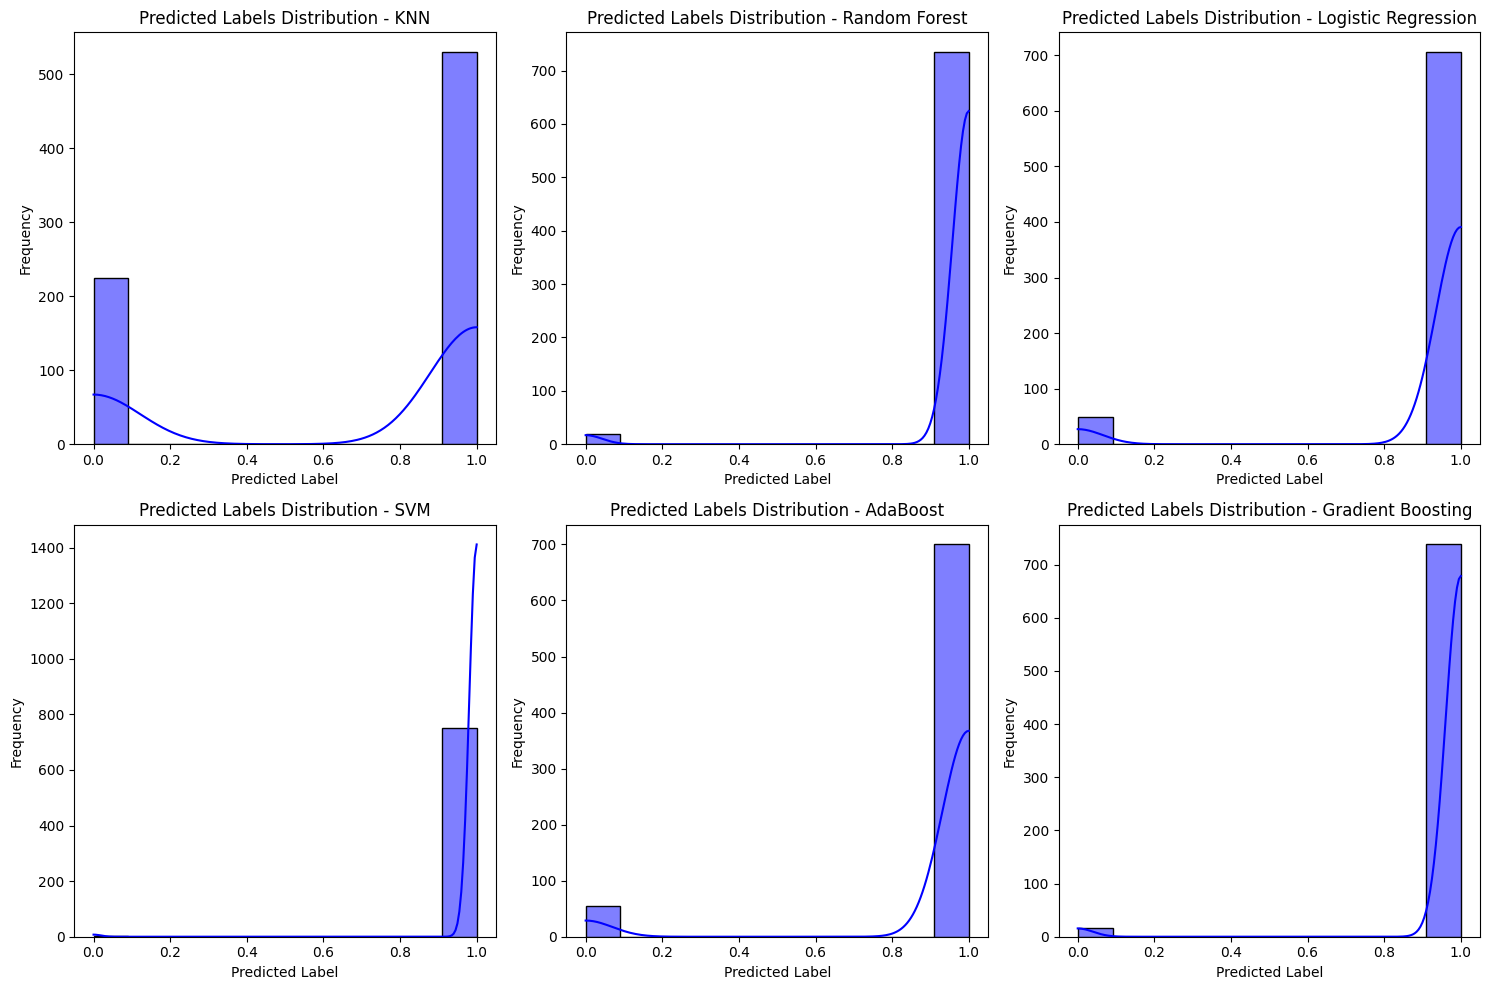

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

# Load the dataset
thyroid_df = pd.read_csv("/content/th.csv")

# Preprocess the data
thyroid_df.rename(columns={'binaryClass': 'Label'}, inplace=True)
thyroid_df.replace('?', np.nan, inplace=True)
thyroid_df.drop(['T3 measured', 'TSH measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'TBG',
                 'referral source', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                 'query hypothyroid', 'query hyperthyroid', 'hypopituitary', 'psych'], axis=1, inplace=True)

# One-hot encode categorical variables
thyroid_df_encoded = pd.get_dummies(thyroid_df, drop_first=True)

# Separate features and target variable
X = thyroid_df_encoded.drop('Label_P', axis=1)
y = thyroid_df_encoded['Label_P']

X = X.astype(float)  # Convert X to float type if it's not already
y = y.astype(int)    # Convert y to int type if it's not already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Apply SMOTE resampling to balance the classes
smote = SMOTE(random_state=11)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=500),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_smote, y_smote)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Predictions': y_pred
    }

# Plot histograms for predicted labels
plt.figure(figsize=(15, 10))
for i, (name, metrics) in enumerate(results.items(), start=1):
    plt.subplot(2, 3, i)
    sns.histplot(metrics['Predictions'], color='blue', kde=True)
    plt.xlabel('Predicted Label')
    plt.ylabel('Frequency')
    plt.title(f'Predicted Labels Distribution - {name}')
plt.tight_layout()
plt.show()


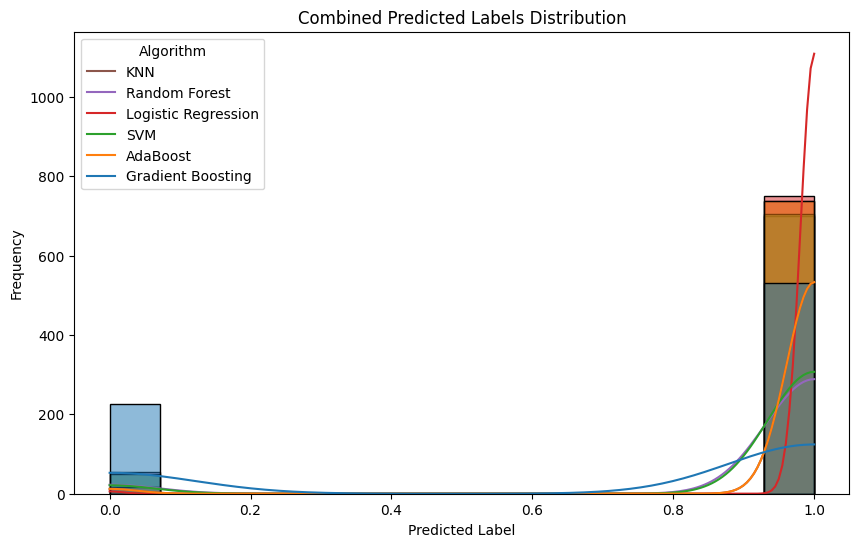

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import pickle

# Load the dataset
thyroid_df = pd.read_csv("/content/th.csv")

# Preprocess the data
thyroid_df.rename(columns={'binaryClass': 'Label'}, inplace=True)
thyroid_df.replace('?', np.nan, inplace=True)
thyroid_df.drop(['T3 measured', 'TSH measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured', 'TBG',
                 'referral source', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication',
                 'query hypothyroid', 'query hyperthyroid', 'hypopituitary', 'psych'], axis=1, inplace=True)

# One-hot encode categorical variables
thyroid_df_encoded = pd.get_dummies(thyroid_df, drop_first=True)

# Separate features and target variable
X = thyroid_df_encoded.drop('Label_P', axis=1)
y = thyroid_df_encoded['Label_P']

X = X.astype(float)  # Convert X to float type if it's not already
y = y.astype(int)    # Convert y to int type if it's not already

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Apply SMOTE resampling to balance the classes
smote = SMOTE(random_state=11)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the classifiers
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=500),
    'Logistic Regression': LogisticRegression(max_iter=500),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each classifier
results = {}
combined_predictions = pd.DataFrame()  # Initialize a dataframe to store combined predictions
for name, clf in classifiers.items():
    clf.fit(X_smote, y_smote)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Predictions': y_pred
    }

    combined_predictions[name] = y_pred  # Add predictions to combined dataframe

# Plot histogram for combined predictions
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_predictions, kde=True)
plt.xlabel('Predicted Label')
plt.ylabel('Frequency')
plt.title('Combined Predicted Labels Distribution')
plt.legend(title='Algorithm', labels=combined_predictions.columns)
plt.show()